## Compare track cuts (onspill MDC2020au)

Understanding track parameters. 

track_cuts_1: 

```python
self.cuts_to_toggle = {
            "has_hits" : False,
            "within_lhr_max" : False,
            "within_d0" : False,
            "within_pitch_angle" : False,
            "unvetoed" : False
        }
```

represented by

```yaml
process:
    cutset_name: "track_cuts"
```

All loop helix parameter arrays are the same length, which is needed to 2D comparison. 


## Tag

In [1]:
# ana_name = "au"
ds_tag = "au"

## Premable

In [2]:
# External packages
import sys
import warnings
warnings.filterwarnings("ignore") # suppress warnings
import awkward as ak
import matplotlib.pyplot as plt

# pyutils classes
from pyutils.pylogger import Logger
from pyutils.pyprint import Print
from pyutils.pyselect import Select
from pyutils.pyplot import Plot
from pyutils.pyvector import Vector

# mu2e-cosmic classes
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw
from efficiency import Efficiency 

# Make everything available when using "from preamble import *"
__all__ = ["Logger", "Print", "Load", "Draw", "Efficiency"] 

## Load data

In [3]:
!ls ../../output/results/track_cuts*

../../output/results/track_cuts_CRY_offspill-LH_as:
cut_flow.csv	results.pkl
efficiency.csv	track_cuts_CRY_offspill-LH_as.log
events.parquet	track_cuts_CRY_offspill-LH_as.yaml
hists.h5

../../output/results/track_cuts_CRY_offspill-LH_au:
cut_flow.csv	events.parquet	info.txt     track_cuts_CRY_onspill-LH_au.log
efficiency.csv	hists.h5	results.pkl  track_cuts_CRY_onspill-LH_au.yaml

../../output/results/track_cuts_CRY_onspill-LH_au:
cut_flow.csv	results.pkl
efficiency.csv	track_cuts_CRY_onspill-LH_au.log
events.parquet	track_cuts_CRY_onspill-LH_au.yaml
hists.h5

../../output/results/track_cuts_CRY_onspill-LH_aw:
cut_flow.csv	results.pkl
efficiency.csv	track_cuts_CRY_onspill-LH_aw.log
events.parquet	track_cuts_CRY_onspill-LH_aw.yaml
hists.h5

../../output/results/track_cuts_signal_onspill-LH_aq:
cut_flow.csv	results.pkl
efficiency.csv	track_cuts_signal_onspill-LH_aq.log
events.parquet	track_cuts_signal_onspill-LH_aq.yaml
hists.h5

../../output/results/track_cuts_signal_onspill-LH_au:
cut_

In [5]:
onspill = Load(in_path = f"../../output/results/track_cuts_CRY_onspill-LH_{ds_tag}").load_pkl()
signal = Load(in_path = f"../../output/results/track_cuts_signal_onspill-LH_{ds_tag}").load_pkl()

[Load] ✅ Initialised with out_path=../../output/results/track_cuts_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/track_cuts_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/track_cuts_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/track_cuts_signal_onspill-LH_au/results.pkl


## Check cut flows

In [6]:
display(onspill["cut_flow"])
display(signal["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,267495,100.000000,100.000000,No selection applied
1,is_reco_electron,258586,96.669470,96.669470,Electron track fits
2,has_trk_front,256419,95.859362,99.161981,Tracks intersect tracker entrance
3,good_trkqual,45137,16.873960,17.602830,Track fit quality > 0.8
4,within_t0,36789,13.753154,81.505195,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,26331,9.843548,71.573025,Downstream tracks (p_z > 0 at tracker entrance)
6,is_truth_electron,17328,6.477878,65.808363,Track parents are electrons (truth PID)
7,one_reco_electron,11449,4.280080,66.072253,One reco electron / event
8,within_ext_win,1671,0.624685,14.595161,Extended window (100 < p < 110 MeV/c)
9,within_sig_win,224,0.083740,13.405147,Signal window (103.6 < p < 104.9 MeV/c)


,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,145542,100.000000,100.000000,No selection applied
1,is_reco_electron,145430,99.923046,99.923046,Electron track fits
2,has_trk_front,142980,98.239683,98.315341,Tracks intersect tracker entrance
3,good_trkqual,79376,54.538209,55.515457,Track fit quality > 0.8
4,within_t0,57472,39.488258,72.404757,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,57469,39.486196,99.994780,Downstream tracks (p_z > 0 at tracker entrance)
6,is_truth_electron,57469,39.486196,100.000000,Track parents are electrons (truth PID)
7,one_reco_electron,57402,39.440162,99.883415,One reco electron / event
8,within_ext_win,54761,37.625565,95.399115,Extended window (100 < p < 110 MeV/c)
9,within_sig_win,42524,29.217683,77.653805,Signal window (103.6 < p < 104.9 MeV/c)


In [7]:
print(len(onspill["events"]))
print(len(signal["events"]))

11449
57402


## Surface cut (not applied to filtered array)

In [9]:
selector = Select()

def apply_trk_ent_cut(data): 

    this_data = ak.copy(data)
    
    # Track front 
    at_trk_front = selector.select_surface(this_data["trkfit"], surface_name="TT_Front") # trksegs-level
    has_trk_front = ak.any(at_trk_front, axis=-1)

    this_data["trkfit"] = this_data["trkfit"][at_trk_front]
    
    # # Then clean up events with no tracks after cuts
    this_data = this_data[ak.any(has_trk_front, axis=-1)]

    print("Done")

    return this_data

onspill["events"] = apply_trk_ent_cut(onspill["events"])
signal["events"] = apply_trk_ent_cut(signal["events"])

[pyselect] ✅ Returning mask for trksegs with sid = 0
Done
[pyselect] ✅ Returning mask for trksegs with sid = 0
Done


## Calculate pitch angle

In [10]:
vector = Vector()
import numpy as np
def calc_pitch_angle(data):

    pvec = vector.get_vector(data["trkfit"]["trksegs"], "mom")
    pt = np.sqrt(pvec["x"]**2 + pvec["y"]**2) # vector.get_vector(signal["trkfit"]["trksegs"], "mom")
    
    p = vector.get_mag(data["trkfit"]["trksegs"], "mom") 
    pz = data["trkfit"]["trksegs"]["mom"]["fCoordinates"]["fZ"]

    cos_theta = pt / p  
    theta = np.arccos(cos_theta)
    tan_dip_check = np.tan(theta)

    tan_dip = pz/pt 

    data["tan_dip"] = tan_dip
    # data["tan_dip_check"] = tan_dip_check

calc_pitch_angle(signal["events"])
calc_pitch_angle(onspill["events"])

[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


## Cutsets 

In [36]:
import yaml
with open("../../config/common/cuts.yaml", "r") as f:
    cut_config = yaml.safe_load(f)
config["cutsets"]["alpha"]["thresholds"]

KeyError: 'thresholds'

## Plot

In [18]:
tag = "1"

In [11]:
plot = Plot()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [69]:
# fig, ax = plt.subplots()

# plot.plot_1D(
#     ak.flatten(onspill["events"]["trk"]["trkqual.result"], axis=None),
#     nbins=100,xmin=0,xmax=1,norm_by_area=False,
#     show=False,
#     ax=ax,
#     xlabel="Track quality",
#     ylabel="Norm. tracks"
# )

# ax.axvline(20, linestyle="--", color="grey")
# plt.tight_layout()
# plt.savefig(f"../../output/images/comp/h1o_trkqual_{ana_name}.png", dpi=300)
# plt.show()

## nactive

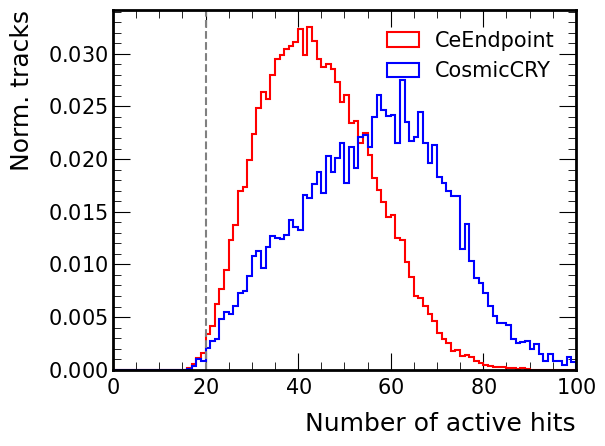

In [13]:
fig, ax = plt.subplots()

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trk"]["trk.nactive"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trk"]["trk.nactive"], axis=None)
    },
    nbins=100,xmin=0,xmax=100,norm_by_area=True,
    show=False,
    ax=ax,
    xlabel="Number of active hits",
    ylabel="Norm. tracks"
)

ax.axvline(20, linestyle="--", color="grey")
plt.tight_layout()
plt.savefig(f"../../output/images/comp/h1o_nactive_{ds_tag}.png", dpi=300)
plt.show()

## Loop helix track cuts summary (cutset alpha)

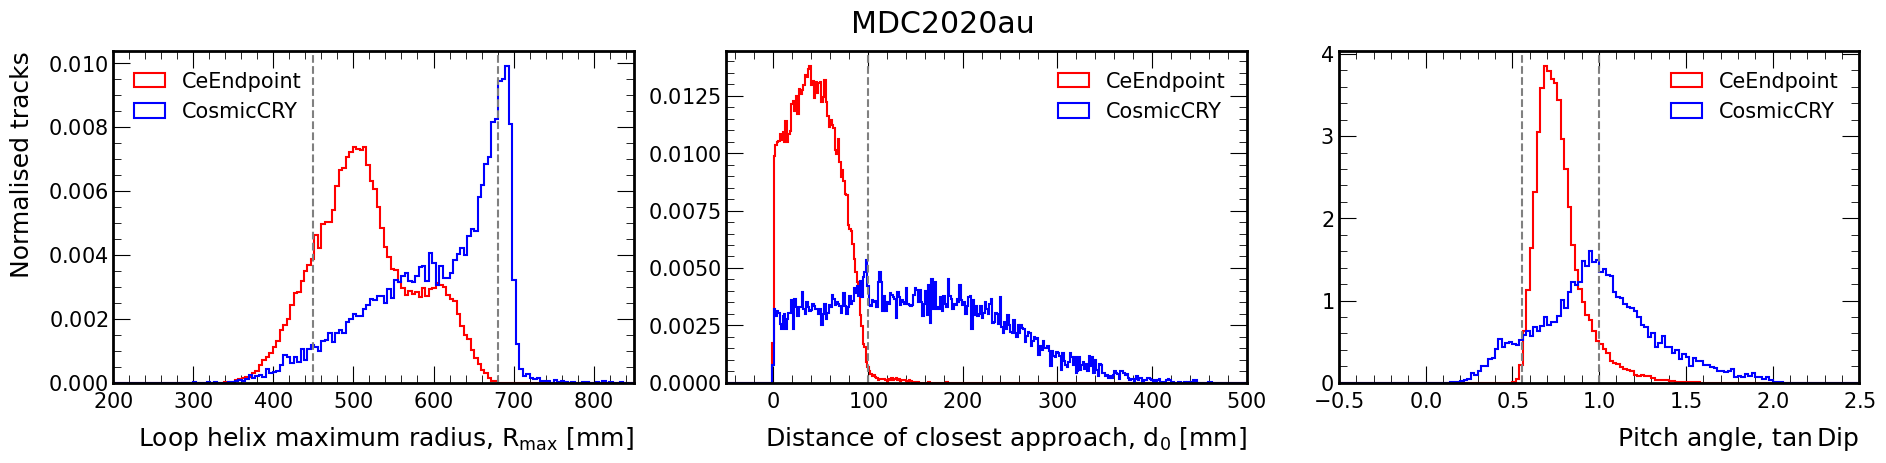

Wrote ../../output/images/comp/h1o_1x3_alpha_track_cuts_summary_au.png


In [16]:
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8))

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
    },
    nbins=75*2,xmin=200,xmax=850,norm_by_area=True,
    show=False,
    ax=ax[0],
    xlabel=r"Loop helix maximum radius, $R_{\text{max}}$ [mm]",
    ylabel="Normalised tracks",
)

ax[0].axvline(450, linestyle="--", color="grey")
ax[0].axvline(680, linestyle="--", color="grey")

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None)
    },
    nbins=350,xmin=-50,xmax=500,norm_by_area=True,
    show=False,
    ax=ax[1],
    xlabel=r"Distance of closest approach, $d_{0}$ [mm]",
    # ylabel="Norm. tracks"
)


ax[1].axvline(100, linestyle="--", color="grey")

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["tan_dip"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["tan_dip"], axis=None)
    },
    nbins=150,xmin=-0.5,xmax=2.5,norm_by_area=True,
    show=False,
    # leg_pos="upper left",
    ax=ax[2],
    xlabel=r"Pitch angle, pitch angle",
    # ylabel="Norm. tracks"
)

ax[2].axvline(0.5577350, linestyle="--", color="grey")
ax[2].axvline(1.0, linestyle="--", color="grey")
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle(f"MDC2020{ds_tag}")

# plt.tight_layout()
out_path=f"../../output/images/comp/h1o_1x3_alpha_track_cuts_summary_{ds_tag}.png"
plt.savefig(out_path, dpi=300)
plt.show()

print(f"Wrote {out_path}")

Wrote ../../output/images/comp/h2o_alpha_trk_corr_overlay_au.png


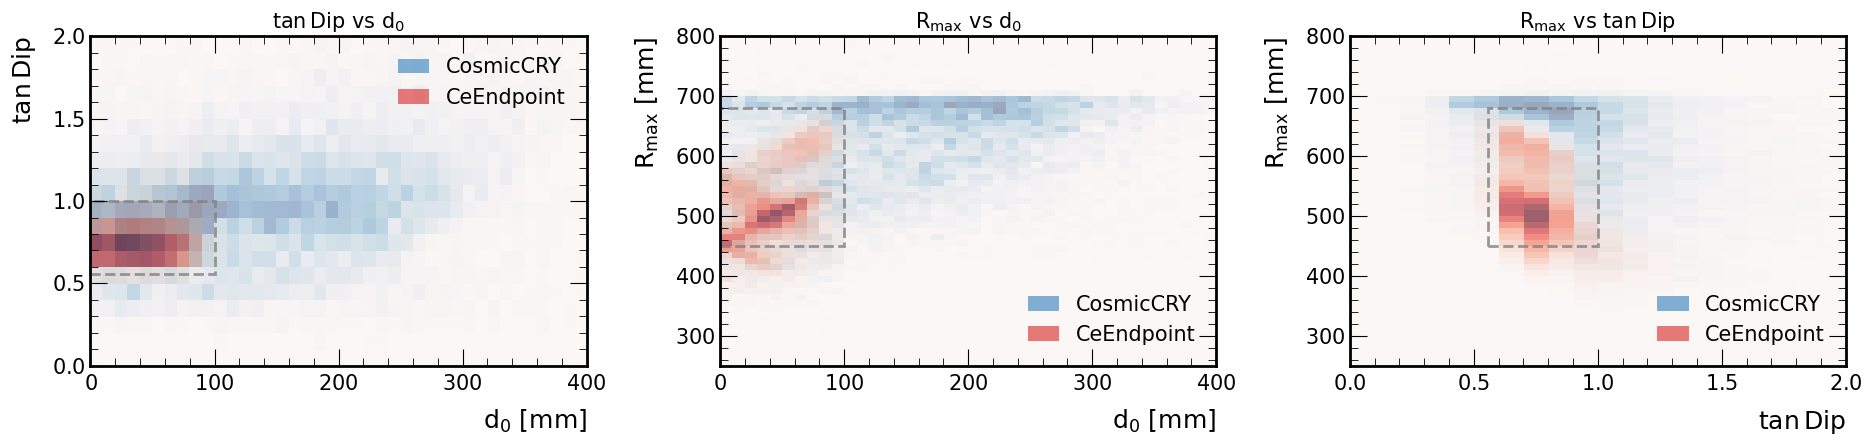

In [23]:
# Define your bin densities
BIN_DENSITY = {
    "d0": 0.1,      # bins per mm (10 mm per bin)
    "theta": 10,    # bins per tan(theta) (10 units per bin)
    "rmax": 0.1     # bins per mm (10 mm per bin)
}

# Define ranges (use the broader cosmic ranges for overlays)
RANGES = {
    "d0": (0, 400),       
    "theta": (0, 2),
    "rmax": (250, 800)   
}

# Define cut boxes - these correspond to your 1D cut lines
CUT_BOXES = {
    "d0_vs_theta": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100 from your 1D plot
        "theta_min": 0.5577350, "theta_max": 1.0  # between your two tan(dip) lines
    },
    "d0_vs_rmax": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100
        "rmax_min": 450, "rmax_max": 680  # between your two Rmax lines
    },
    "theta_vs_rmax": {
        "theta_min": 0.5577350, "theta_max": 1.0,  # between tan(dip) lines
        "rmax_min": 450, "rmax_max": 680  # between Rmax lines
    }
}

def get_bins(param, range_key):
    """Calculate consistent bins based on density and range"""
    min_val, max_val = RANGES[range_key]
    n_bins = int((max_val - min_val) * BIN_DENSITY[param])
    return n_bins, min_val, max_val

def add_cut_box(ax, box_params, box_style=None):
    """Add a rectangular cut box to the plot"""
    from matplotlib.patches import Rectangle
    
    if box_style is None:
        box_style = {
            'linewidth': 2,
            'edgecolor': 'grey',
            'facecolor': 'none',
            'linestyle': '--',
            'alpha': 0.8
        }
    
    # Extract box coordinates
    if 'd0_min' in box_params and 'd0_max' in box_params:
        x_min, x_max = box_params['d0_min'], box_params['d0_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        x_min, x_max = box_params['theta_min'], box_params['theta_max']
    
    if 'theta_min' in box_params and 'theta_max' in box_params and 'd0_min' not in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'rmax_min' in box_params and 'rmax_max' in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        y_min, y_max = box_params['theta_min'], box_params['theta_max']
    
    # Create rectangle
    width = x_max - x_min
    height = y_max - y_min
    rect = Rectangle((x_min, y_min), width, height, **box_style)
    ax.add_patch(rect)

# Create the plots with overlaid distributions
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8*1))

# Transparency 
alpha = 0.6

# Plot 1: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("theta", "theta")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["events"]["tan_dip"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["events"]["tan_dip"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$\tan{\text{Dip}}$",
    title=r"$\tan{\text{Dip}}$ vs $d_0$",
    ax=ax[0], show=False, leg_pos="upper right"
)
# Add cut box to first plot
add_cut_box(ax[0], CUT_BOXES["d0_vs_theta"])

# Plot 2: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title=r"$R_{\text{max}}$ vs $d_0$",
    ax=ax[1], show=False, leg_pos="lower right"
)
# Add cut box to second plot
add_cut_box(ax[1], CUT_BOXES["d0_vs_rmax"])

# Plot 3: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["tan_dip"], axis=None),
    y1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["tan_dip"], axis=None),
    y2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$\tan{\text{Dip}}$",
    ylabel=r"$R_{\text{max}}$ [mm]", 
    title=r"$R_{\text{max}}$ vs $\tan{\text{Dip}}$",
    ax=ax[2], show=False, leg_pos="lower right"
)
# Add cut box to third plot
add_cut_box(ax[2], CUT_BOXES["theta_vs_rmax"])

plt.tight_layout()
out_path = f"../../output/images/comp/h2o_alpha_trk_corr_overlay_{ds_tag}.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

## Cutset SU2020 fit parameters

* trkqual.result
* trk.nactive
* trksegs_lr.t0err
* trksegs_lr.maxr
* trksegs_lr.tanDip # pz/pt
* trksegs_lr.d0


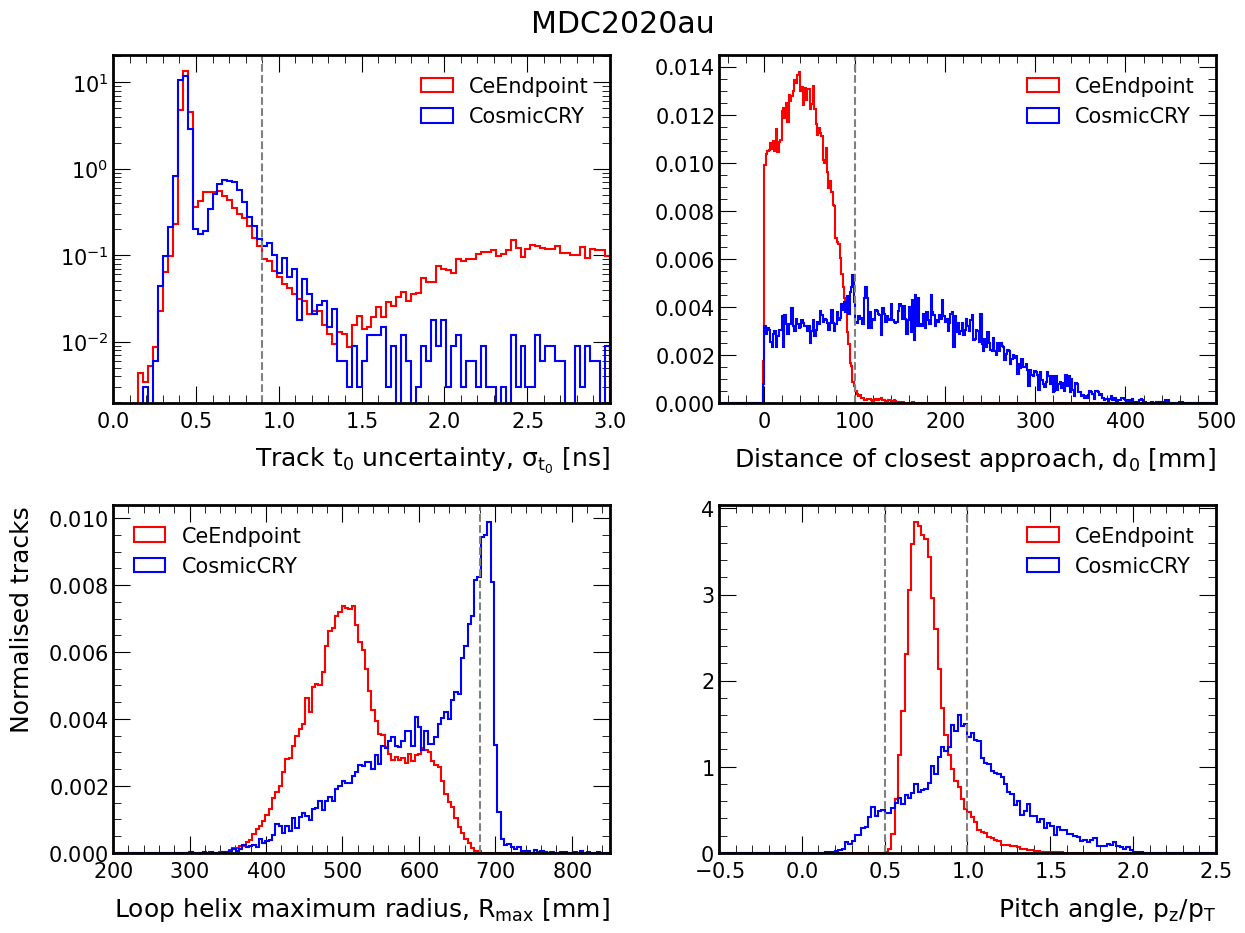

Wrote ../../output/images/comp/h1o_2x2_SU2020_track_cuts_summary_au.png


In [92]:
# fig, ax = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# plot.plot_1D_overlay(
#     {
#         "CeEndpoint" : ak.flatten(signal["events"]["trk"]["trkqual.result"], axis=None), 
#         "CosmicCRY" : ak.flatten(onspill["events"]["trk"]["trkqual.result"], axis=None)
#     },
#     nbins=102,xmin=-0.01,xmax=1.01,norm_by_area=True,
#     show=False,
#     ax=ax[0,0],
#     xlabel=r"Track quality",
#     ylabel="Normalised tracks",
# )
# ax[0,0].axvline(0.2, linestyle="--", color="grey")

# plot.plot_1D_overlay(
#     {
#         "CeEndpoint" : ak.flatten(signal["events"]["trk"]["trk.nactive"], axis=None), 
#         "CosmicCRY" : ak.flatten(onspill["events"]["trk"]["trk.nactive"], axis=None)
#     },
#     nbins=100,xmin=0,xmax=100,norm_by_area=True,
#     show=False,
#     ax=ax[0,1],
#     xlabel="Active tracker hits",
# )
# ax[0,1].axvline(20, linestyle="--", color="grey")

fig, ax = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2))

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["t0err"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["t0err"], axis=None)
    },
    nbins=100,xmin=0,xmax=3.0,norm_by_area=True,
    show=False,
    ax=ax[0,0],
    xlabel=r"Track $t_{0}$ uncertainty, $\sigma_{t_{0}}$ [ns]",
    log_y=True
)
ax[0,0].axvline(0.9, linestyle="--", color="grey")

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None)
    },
    nbins=350,xmin=-50,xmax=500,norm_by_area=True,
    show=False,
    ax=ax[0,1],
    xlabel=r"Distance of closest approach, $d_{0}$ [mm]",
    # ylabel="Norm. tracks"
)
ax[0,1].axvline(100, linestyle="--", color="grey")

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
    },
    nbins=75*2,xmin=200,xmax=850,norm_by_area=True,
    show=False,
    ax=ax[1,0],
    xlabel=r"Loop helix maximum radius, $R_{\text{max}}$ [mm]",
    ylabel="Normalised tracks",
)

ax[1,0].axvline(680, linestyle="--", color="grey")

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["events"]["tan_dip"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["events"]["tan_dip"], axis=None)
    },
    nbins=150,xmin=-0.5,xmax=2.5,norm_by_area=True,
    show=False,
    # leg_pos="upper left",
    ax=ax[1,1],
    xlabel=r"Pitch angle, $p_{z}/p_{T}$",
    # ylabel="Norm. tracks"
)

ax[1,1].axvline(0.5, linestyle="--", color="grey")
ax[1,1].axvline(1.0, linestyle="--", color="grey")

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle(f"MDC2020{ana_name}")

# plt.tight_layout()
out_path=f"../../output/images/comp/h1o_2x2_SU2020_track_cuts_summary_{ana_name}.png"

plt.savefig(out_path, dpi=300)
plt.show()

print(f"Wrote {out_path}")

## TODO :) 

In [ ]:
# Define your bin densities
BIN_DENSITY = {
    "t0err": 0.1     # bins per ns (10 ns per bin)
    "d0": 0.1,      # bins per mm (10 mm per bin)
    "theta": 10,    # bins per tan(theta) (10 units per bin)
    "rmax": 0.1     # bins per mm (10 mm per bin)
}

# Define ranges (use the broader cosmic ranges for overlays)
RANGES = {
    "t0err": (0, 3),  
    "d0": (0, 400),       
    "theta": (0, 2),
    "rmax": (250, 800)   
}

# Define cut boxes - these correspond to your 1D cut lines
CUT_BOXES = {
    "t0err_vs_theta": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100 from your 1D plot
        "theta_min": 0.5, "theta_max": 1.0  # between your two tan(dip) lines
    },
    "d0_vs_theta": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100 from your 1D plot
        "theta_min": 0.5, "theta_max": 1.0  # between your two tan(dip) lines
    },
    "d0_vs_rmax": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100
        "rmax_min": 450, "rmax_max": 680  # between your two Rmax lines
    },
    "theta_vs_rmax": {
        "theta_min": 0.5, "theta_max": 1.0,  # between tan(dip) lines
        "rmax_min": 450, "rmax_max": 680  # between Rmax lines
    }
}

def get_bins(param, range_key):
    """Calculate consistent bins based on density and range"""
    min_val, max_val = RANGES[range_key]
    n_bins = int((max_val - min_val) * BIN_DENSITY[param])
    return n_bins, min_val, max_val

def add_cut_box(ax, box_params, box_style=None):
    """Add a rectangular cut box to the plot"""
    from matplotlib.patches import Rectangle
    
    if box_style is None:
        box_style = {
            'linewidth': 2,
            'edgecolor': 'grey',
            'facecolor': 'none',
            'linestyle': '--',
            'alpha': 0.8
        }
    
    # Extract box coordinates
    if 'd0_min' in box_params and 'd0_max' in box_params:
        x_min, x_max = box_params['d0_min'], box_params['d0_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        x_min, x_max = box_params['theta_min'], box_params['theta_max']
    
    if 'theta_min' in box_params and 'theta_max' in box_params and 'd0_min' not in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'rmax_min' in box_params and 'rmax_max' in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        y_min, y_max = box_params['theta_min'], box_params['theta_max']
    
    # Create rectangle
    width = x_max - x_min
    height = y_max - y_min
    rect = Rectangle((x_min, y_min), width, height, **box_style)
    ax.add_patch(rect)

# Create the plots with overlaid distributions
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8*1))

# Transparency 
alpha = 0.6

# Plot 1: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("theta", "theta")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["events"]["tan_dip"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["events"]["tan_dip"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$\tan{\text{Dip}}$",
    title=r"$\tan{\text{Dip}}$ vs $d_0$",
    ax=ax[0], show=False, leg_pos="upper right"
)
# Add cut box to first plot
add_cut_box(ax[0], CUT_BOXES["d0_vs_theta"])

# Plot 2: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title=r"$R_{\text{max}}$ vs $d_0$",
    ax=ax[1], show=False, leg_pos="lower right"
)
# Add cut box to second plot
add_cut_box(ax[1], CUT_BOXES["d0_vs_rmax"])

# Plot 3: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot.plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["events"]["tan_dip"], axis=None),
    y1=ak.flatten(onspill["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["events"]["tan_dip"], axis=None),
    y2=ak.flatten(signal["events"]["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$\tan{\text{Dip}}$",
    ylabel=r"$R_{\text{max}}$ [mm]", 
    title=r"$R_{\text{max}}$ vs $\tan{\text{Dip}}$",
    ax=ax[2], show=False, leg_pos="lower right"
)
# Add cut box to third plot
add_cut_box(ax[2], CUT_BOXES["theta_vs_rmax"])

plt.tight_layout()
out_path = f"../../output/images/comp/h2o_alpha_trk_corr_overlay_{ds_tag}.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

## R_max

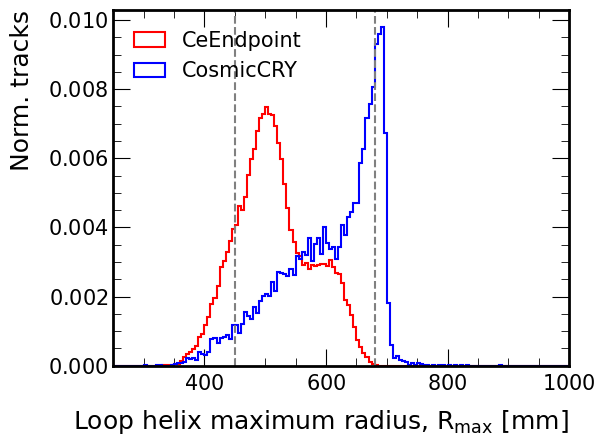

In [23]:
fig, ax = plt.subplots()

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
    },
    nbins=75*2,xmin=250,xmax=1000,norm_by_area=True,
    show=False,
    ax=ax,
    xlabel=r"Loop helix maximum radius, $R_{\text{max}}$ [mm]",
    ylabel="Norm. tracks"
)

ax.axvline(450, linestyle="--", color="grey")
ax.axvline(680, linestyle="--", color="grey")
plt.tight_layout()
plt.savefig(f"../../img/comp/h1o_lhrmax_{tag}.png", dpi=300)
plt.show()

## d_0

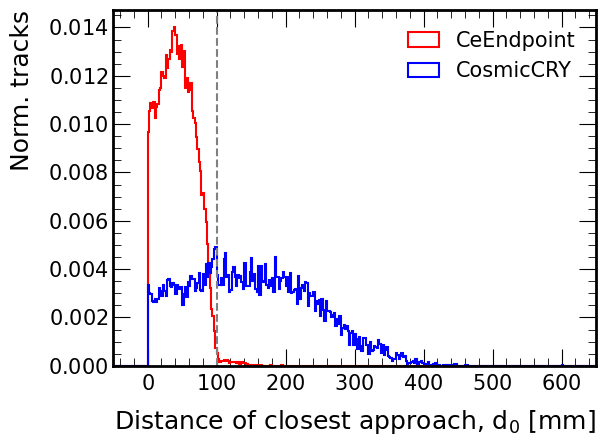

In [24]:
fig, ax = plt.subplots()

plot.plot_1D_overlay(
    {
        "CeEndpoint" : ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None)
    },
    nbins=350,xmin=-50,xmax=650,norm_by_area=True,
    show=False,
    ax=ax,
    xlabel=r"Distance of closest approach, $d_{0}$ [mm]",
    ylabel="Norm. tracks"
)


ax.axvline(100, linestyle="--", color="grey")
plt.tight_layout()
plt.savefig(f"../../img/comp/h1o_d0_{tag}.png", dpi=300)
plt.show()

## tanDip

https://github.com/Mu2e/Offline/blob/dbd817aa83fd8dd9acd7c106df46a2a0195955bb/CalPatRec/src/CalHelixFinderAlg.cc#L102-L103

the dip angle is measured WRT the perpendicular.  It is signed by the particle Z momentum

```C++
pvec[HelixTraj::tanDipIndex] = amsign/(radius*Helix._dfdz);
```

[pyselect] ✅ Returning mask for trksegs with sid = 0 and sindex = 0
[pyselect] ✅ Returning mask for upstream track segments (p_z < 0)
[pyselect] ✅ Returning mask for downstream track segments (p_z > 0)
[pyselect] ✅ Returning mask for reflected tracks
[pyselect] ✅ Returning mask for trksegs with sid = 0 and sindex = 0
[pyselect] ✅ Returning mask for upstream track segments (p_z < 0)
[pyselect] ✅ Returning mask for downstream track segments (p_z > 0)
[pyselect] ✅ Returning mask for reflected tracks


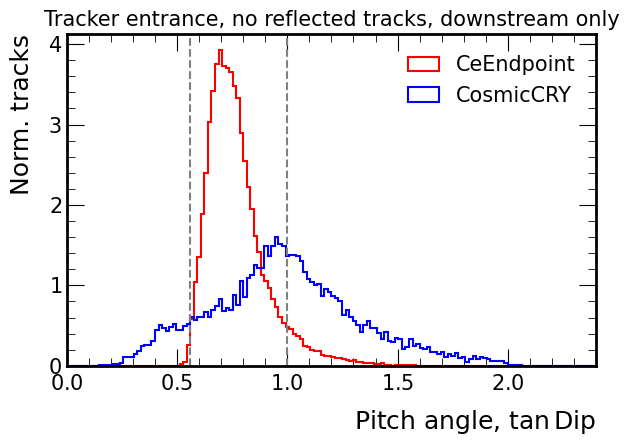

Wrote ../../img/comp/h1o_tandip_1.png


In [25]:
fig, ax = plt.subplots()

is_reflected_signal = selector.is_reflected(signal["trkfit"])
is_reflected_onspill = selector.is_reflected(onspill["trkfit"])

plot.plot_1D_overlay(
    {
        # "CeEndpoint" : ak.flatten(signal["trkfit"]["trksegpars_lh"]["tanDip"], axis=None), 
        # "CosmicCRY" : ak.flatten(onspill["trkfit"]["trksegpars_lh"]["tanDip"], axis=None),
        "CeEndpoint" : ak.flatten(signal["tan_dip"], axis=None), 
        "CosmicCRY" : ak.flatten(onspill["tan_dip"], axis=None)
    },
    nbins=150,xmin=0,xmax=2.4,norm_by_area=True,
    show=False,
    # leg_pos="upper left",
    ax=ax,
    title="Tracker entrance, no reflected tracks, downstream only",
    xlabel=r"Pitch angle, pitch angle",
    ylabel="Norm. tracks"
)


ax.axvline(0.5577350, linestyle="--", color="grey")
ax.axvline(1.0, linestyle="--", color="grey")
plt.tight_layout()
out_path = f"../../img/comp/h1o_tandip_{tag}.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Wrote {out_path}")

## d_0 vs mom

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


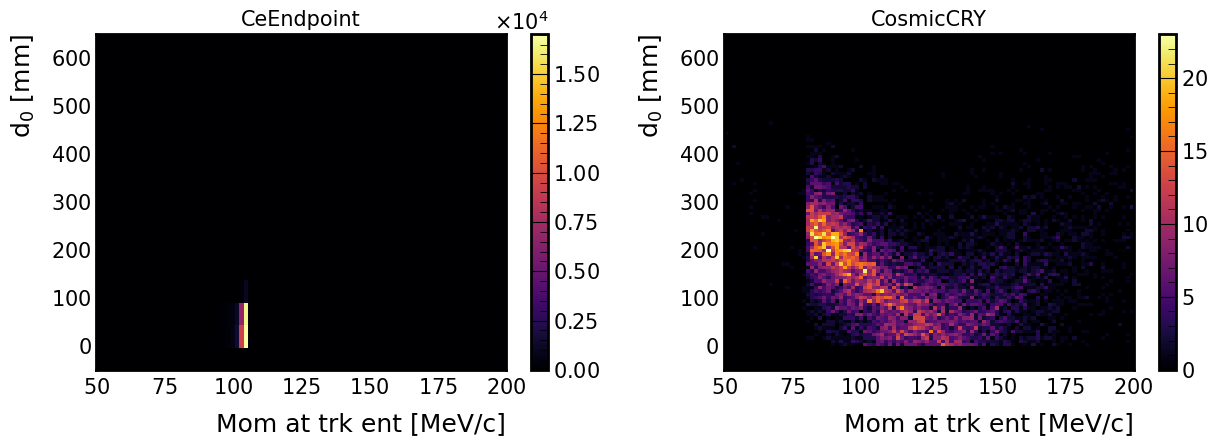

In [26]:
plotter=Plot()
# nhits_signal = ak.flatten(signal["trkfit"]["trksegpars_lh"]["tanDip"],axis=None)
# nhits_background = ak.flatten(background["trkfit"]["trksegpars_lh"]["tanDip"],axis=None)

fig, ax = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

vector = Vector()

plotter.plot_2D(
    x=ak.flatten(vector.get_mag(signal["trkfit"]["trksegs"], "mom"), axis=None),
    y=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    nbins_x=100,xmin=50,xmax=200,
    nbins_y=15,ymin=-50,ymax=650,
    ax=ax[0],
    show=False,
    xlabel=r"Mom at trk ent [MeV/c]", 
    ylabel=r"$d_{0}$ [mm]",
    title="CeEndpoint"
)

plotter.plot_2D(
    x=ak.flatten(vector.get_mag(onspill["trkfit"]["trksegs"], "mom"), axis=None),
    y=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    nbins_x=100,xmin=50,xmax=200,
    nbins_y=100,ymin=-50,ymax=650,
    ax=ax[1],
    show=False,
    xlabel=r"Mom at trk ent [MeV/c]", 
    ylabel=r"$d_{0}$ [mm]",
    title="CosmicCRY"
)

plt.tight_layout()
plt.savefig(f"../../img/comp/h2_mom_vs_d0_{tag}.png", dpi=300)
plt.show()

# tanDip

what is the relationship with track z-momentum 

[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


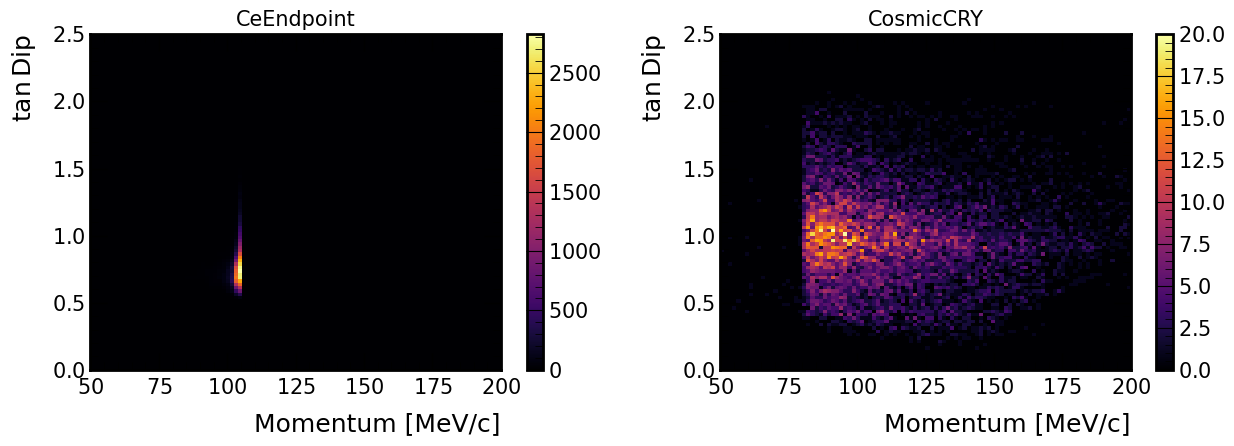

In [27]:
# plot=Plot()
# nhits_signal = ak.flatten(signal["trkfit"]["trksegpars_lh"]["tanDip"],axis=None)
# nhits_background = ak.flatten(background["trkfit"]["trksegpars_lh"]["tanDip"],axis=None)

fig, ax = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

plotter.plot_2D(
    x=ak.flatten(vector.get_mag(signal["trkfit"]["trksegs"], "mom"), axis=None),
    y=ak.flatten(signal["tan_dip"], axis=None),
    nbins_x=100,xmin=50,xmax=200,
    nbins_y=100,ymin=0,ymax=2.5,
    ax=ax[0],
    show=False,
    xlabel=r"Momentum [MeV/c]", 
    ylabel=r"pitch angle",
    title="CeEndpoint",
    log_z=False
)

plotter.plot_2D(
    x=ak.flatten(vector.get_mag(onspill["trkfit"]["trksegs"], "mom"), axis=None),
    y=ak.flatten(onspill["tan_dip"], axis=None),
    nbins_x=100,xmin=50,xmax=200,
    nbins_y=100,ymin=0,ymax=2.5,
    ax=ax[1],
    show=False,
    xlabel=r"Momentum [MeV/c]",
    ylabel=r"pitch angle",
    title="CosmicCRY",
    log_z=False
)

plt.tight_layout()
plt.savefig(f"../../img/comp/h2_mom_vs_tandip_{tag}.png", dpi=300)
plt.show()

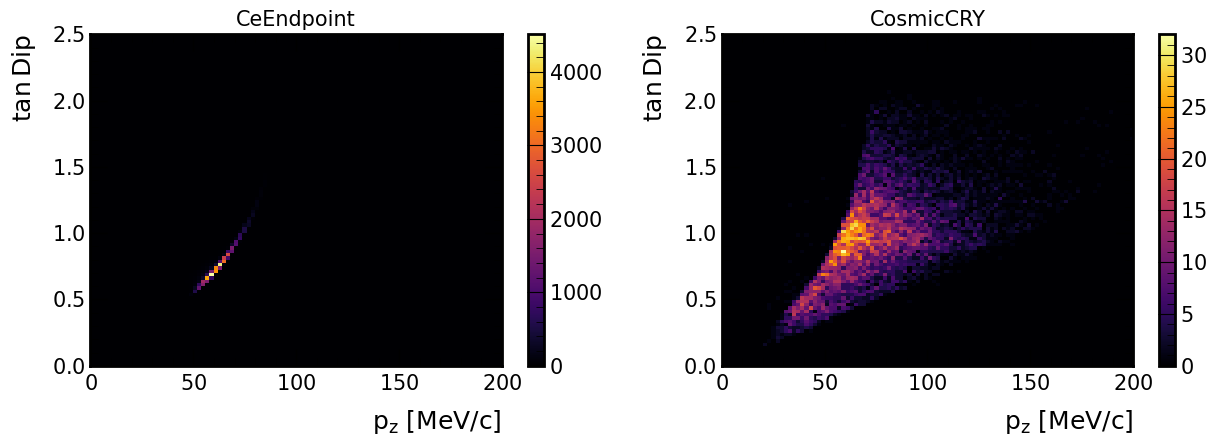

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

plotter.plot_2D(
    x=ak.flatten(signal["trkfit"]["trksegs"]["mom"]["fCoordinates"]["fZ"], axis=None),
    y=ak.flatten(signal["tan_dip"], axis=None),
    nbins_x=100,xmin=0,xmax=200,
    nbins_y=100,ymin=0,ymax=2.5,
    ax=ax[0],
    show=False,
    xlabel=r"$p_{z}$ [MeV/c]", 
    ylabel=r"pitch angle",
    title="CeEndpoint",
    log_z=False
)

plotter.plot_2D(
    x=ak.flatten(onspill["trkfit"]["trksegs"]["mom"]["fCoordinates"]["fZ"], axis=None),
    y=ak.flatten(onspill["tan_dip"], axis=None),
    nbins_x=100,xmin=0,xmax=200,
    nbins_y=100,ymin=0,ymax=2.5,
    ax=ax[1],
    show=False,
    xlabel=r"$p_{z}$ [MeV/c]",
    ylabel=r"pitch angle",
    title="CosmicCRY",
    log_z=False
)

plt.tight_layout()
plt.savefig(f"../../img/comp/h2_pz_vs_tandip_{tag}.png", dpi=300)
plt.show()

## Correlations 

Wrote ../../img/comp/h2_trk_corr.png


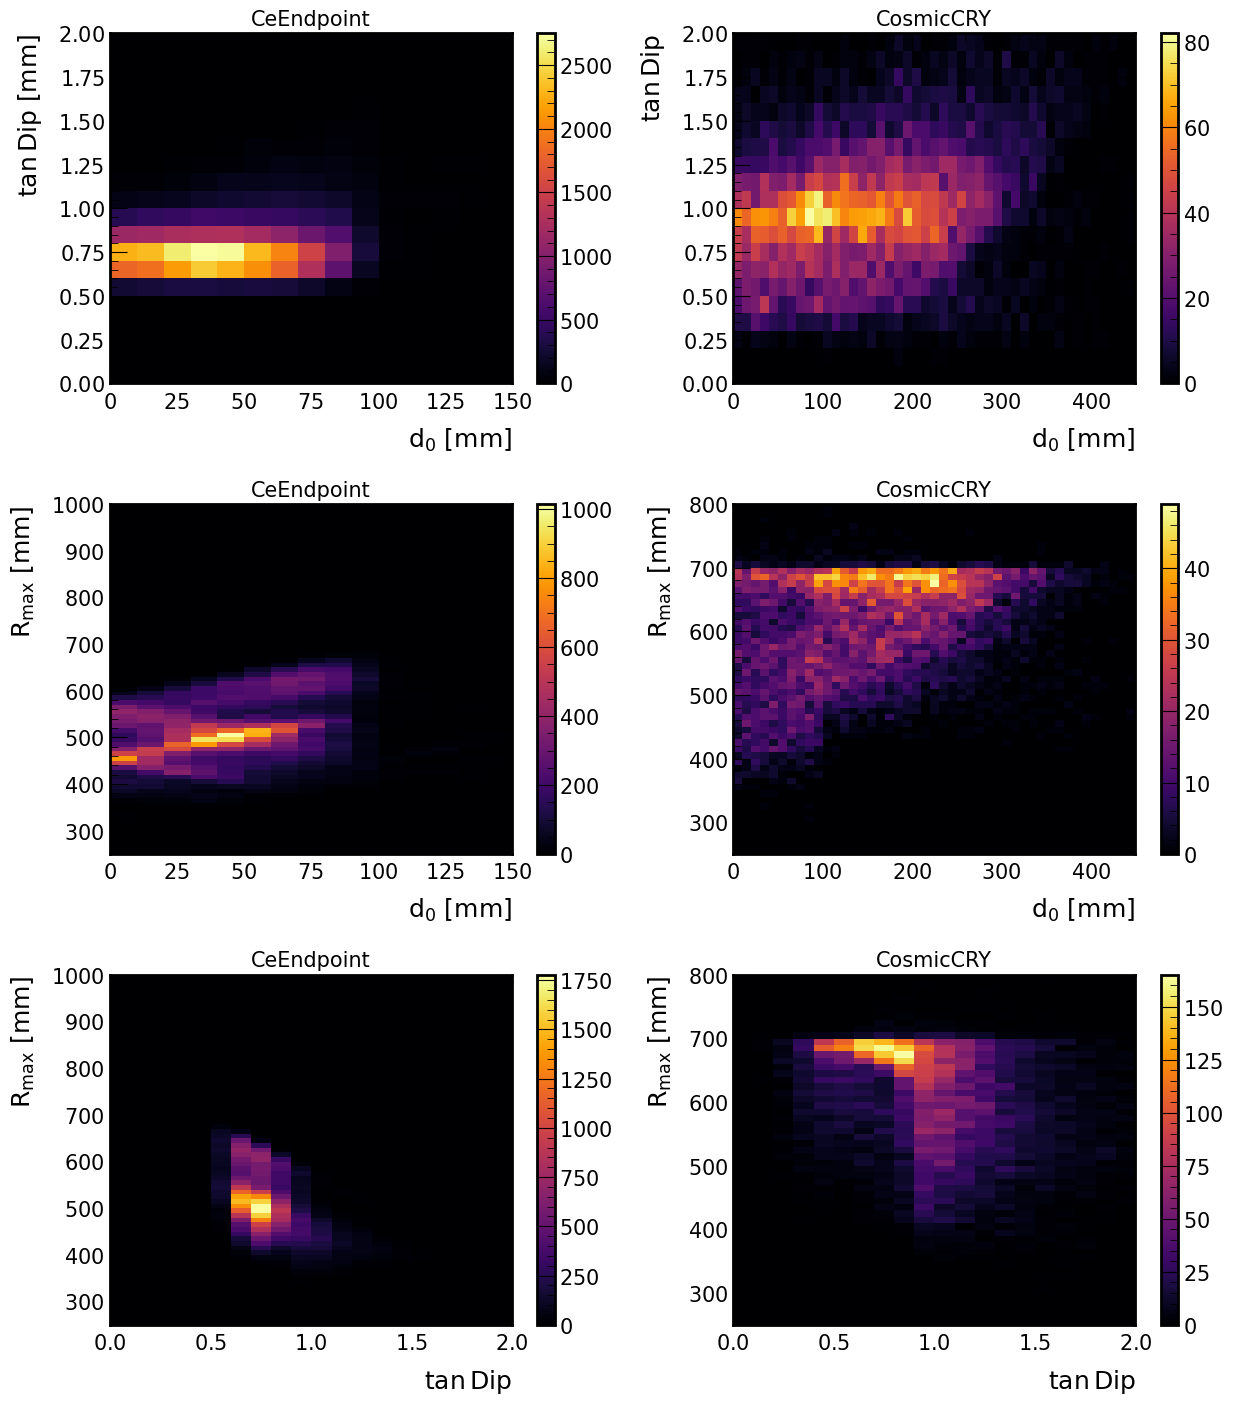

In [30]:
# Define your bin densities
BIN_DENSITY = {
    "d0": 0.1,      # bins per mm (10 mm per bin)
    "theta": 10,    # bins per tan(theta) (10 units per bin)
    "rmax": 0.1     # bins per mm (10 mm per bin)
}

# Define ranges
RANGES = {
    "signal_d0": (0, 150),
    "cosmic_d0": (0, 450), 
    "theta": (0, 2),
    "signal_rmax": (250, 1000),
    "cosmic_rmax": (250, 800)
}

def get_bins(param, range_key):
    """Calculate consistent bins based on density and range"""
    min_val, max_val = RANGES[range_key]
    n_bins = int((max_val - min_val) * BIN_DENSITY[param])
    return n_bins, min_val, max_val

# Create the plots with consistent binning
fig, ax = plt.subplots(3, 2, figsize=(6.4*2, 4.8*3))

# Signal: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "signal_d0")      # 15 bins
nbins_y, ymin, ymax = get_bins("theta", "theta")       # 100 bins
plotter.plot_2D(
    x=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y=ak.flatten(signal["tan_dip"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[0,0],
    show=False,
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"pitch angle [mm]",
    title="CeEndpoint",
    # log_z=True
)

# Signal: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "signal_d0")      # 15 bins
nbins_y, ymin, ymax = get_bins("rmax", "signal_rmax")  # 75 bins
plotter.plot_2D(
    x=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[1,0],
    show=False,
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title="CeEndpoint", 
    # log_z=True
)

# Cosmic: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "cosmic_d0")      # 45 bins
nbins_y, ymin, ymax = get_bins("theta", "theta")       # 100 bins
plotter.plot_2D(
    x=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y=ak.flatten(onspill["tan_dip"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[0,1],
    show=False,
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"pitch angle",
    title="CosmicCRY",
    # log_z=True
)

# Cosmic: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "cosmic_d0")      # 45 bins
nbins_y, ymin, ymax = get_bins("rmax", "cosmic_rmax")  # 55 bins
plotter.plot_2D(
    x=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[1,1],
    show=False,
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title="CosmicCRY", 
    # log_z=True
)

# Signal: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")       # 100 bins
nbins_y, ymin, ymax = get_bins("rmax", "signal_rmax")  # 75 bins
plotter.plot_2D(
    x=ak.flatten(signal["tan_dip"], axis=None),
    y=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[2,0],
    show=False,
    xlabel=r"pitch angle",
    ylabel=r"$R_{\text{max}}$ [mm]",
    title="CeEndpoint"
)

# Cosmic: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")       # 100 bins
nbins_y, ymin, ymax = get_bins("rmax", "cosmic_rmax")  # 55 bins
plotter.plot_2D(
    x=ak.flatten(onspill["tan_dip"], axis=None), 
    y=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    ax=ax[2,1],
    show=False,
    xlabel=r"pitch angle",
    ylabel=r"$R_{\text{max}}$ [mm]", 
    title="CosmicCRY"
)

plt.tight_layout()
out_path = f"../../img/comp/h2_trk_corr.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [31]:
import awkward as ak
import pandas as pd
from scipy.stats import spearmanr

def compute_spearmanr(x, y):
    """
    Spearman correlation coefficients
    """
    x_np = ak.to_numpy(x)
    y_np = ak.to_numpy(y)
    
    # Handle missing or infinite values
    mask = (~pd.isnull(x_np)) & (~pd.isnull(y_np)) & (~pd.isna(x_np)) & (~pd.isna(y_np))
    x_np = x_np[mask]
    y_np = y_np[mask]
    
    if len(x_np) < 2:
        return float("nan"), float("nan"), float("nan")

    # Get coefficients
    spearman_r, _ = spearmanr(x_np, y_np)
                              
    return spearman_r

def classify(r):
    """Classify the strength of correlation based on |r|"""
    r_abs = abs(r)
    if r_abs < 0.1:
        return "None"
    elif r_abs < 0.3:
        return "Weak"
    elif r_abs < 0.5:
        return "Moderate"
    else:
        return "Strong"

def summarise_correlations(data_dict):
    """
    data_dict: dict of form {
        "Label": (x_array, y_array)
    }
    """
    rows = []
    for label, (x, y) in data_dict.items():
        spearman_r = compute_spearmanr(x, y)
        rows.append({
            "Label": label,
            r"Spearman $\rho$": spearman_r,
            "Strength": classify(spearman_r)
        })
    df = pd.DataFrame(rows)
    return df

# Flatten data
signal_d0 = ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None)
signal_theta = ak.flatten(signal["tan_dip"], axis=None)
signal_rmax = ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None)

cosmic_d0 = ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None)
cosmic_theta = ak.flatten(onspill["tan_dip"], axis=None)
cosmic_rmax = ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None)


correlations = summarise_correlations({
    r"CeEndPoint: d0 vs tanDip": (signal_d0, signal_theta),
    r"CeEndPoint: d0 vs Rmax": (signal_d0, signal_rmax),
    r"CeEndPoint: tanDip vs Rmax": (signal_theta, signal_rmax),
    r"CosmicCRY: d0 vs tanDip": (cosmic_d0, cosmic_theta),
    r"CosmicCRY: d0 vs Rmax": (cosmic_d0, cosmic_rmax),
    r"CosmicCRY: tanDip vs Rmax": (cosmic_theta, cosmic_rmax),
})

# Display with rounded values
display(correlations.round(3))
out_path = f"../../txt/comp/trk_corr.csv"
correlations.round(3).to_csv(out_path, index=False)
print("Wrote", out_path)

,Label,Spearman $\rho$,Strength
0,CeEndPoint: d0 vs tanDip,0.107,Weak
1,CeEndPoint: d0 vs Rmax,0.308,Moderate
2,CeEndPoint: tanDip vs Rmax,-0.453,Moderate
3,CosmicCRY: d0 vs tanDip,0.243,Weak
4,CosmicCRY: d0 vs Rmax,0.305,Moderate
5,CosmicCRY: tanDip vs Rmax,-0.338,Moderate


Wrote ../../txt/comp/trk_corr.csv


### This needs to be moved to pyutils

In [32]:
import matplotlib.colors as colors

# TODO: put this in pyplot
def plot_2D_overlay(
    # self,
    x1, y1, x2, y2,
    weights1=None, weights2=None,
    nbins_x=100,
    xmin=-1.0,
    xmax=1.0,
    nbins_y=100,
    ymin=-1.0,
    ymax=1.0,
    title=None,
    xlabel=None,
    ylabel=None,
    zlabel=None,
    out_path=None,
    cmap1="Blues",
    cmap2="Reds", 
    alpha=0.7,
    dpi=300,
    log_x=False,
    log_y=False,
    log_z=False,
    show_cbar=False,
    leg_pos="best",
    ax=None,
    show=True,
    labels=None
    ):

    """
    Plot two overlaid 2D histograms from two pairs of arrays with different colourmaps.
    
    Args:
        x1, y1 (np.ndarray): Arrays for first dataset
        x2, y2 (np.ndarray): Arrays for second dataset  
        weights1, weights2 (np.ndarray, optional): Optional weights for each dataset
        nbins_x (int): Number of bins in x. Defaults to 100
        xmin (float): Minimum x value. Defaults to -1.0
        xmax (float): Maximum x value. Defaults to 1.0
        nbins_y (int): Number of bins in y. Defaults to 100
        ymin (float): Minimum y value. Defaults to -1.0
        ymax (float): Maximum y value. Defaults to 1.0
        title (str, optional): Plot title
        xlabel (str, optional): X-axis label
        ylabel (str, optional): Y-axis label
        zlabel (str, optional): Colourbar label
        out_path (str, optional): Path to save the plot
        cmap1 (str): Matplotlib colourmap for first dataset. Defaults to "Blues"
        cmap2 (str): Matplotlib colourmap for second dataset. Defaults to "Reds"
        alpha (float): Transparency level. Defaults to 0.7
        dpi (int): DPI for saved plot. Defaults to 300
        log_x (bool): Use log scale for x-axis
        log_y (bool): Use log scale for y-axis
        log_z (bool): Use log scale for colour values
        show_cbar (bool): Whether to show colourbar. Defaults to False (not recommended for overlays)
        leg_pos (str): Legend position. Defaults to "best"
        ax (plt.Axes, optional): External custom axes.
        show (bool): Display the plot. Defaults to True
        labels (list, optional): Labels for legend ['Dataset1', 'Dataset2']
        
    Raises:
        ValueError: If input arrays are empty or different lengths
    """
    
    # Process first dataset
    x1 = ak.to_numpy(x1)
    y1 = ak.to_numpy(y1)
    
    # Filter out empty entries for dataset 1
    valid_indices1 = [i for i in range(len(x1)) if np.any(x1[i]) and np.any(y1[i])]
    x1 = [x1[i] for i in valid_indices1]
    y1 = [y1[i] for i in valid_indices1]

    if weights1 is not None:
        weights1 = [weights1[i] for i in valid_indices1]

    # Process second dataset
    x2 = ak.to_numpy(x2)
    y2 = ak.to_numpy(y2)
    
    # Filter out empty entries for dataset 2
    valid_indices2 = [i for i in range(len(x2)) if np.any(x2[i]) and np.any(y2[i])]
    x2 = [x2[i] for i in valid_indices2]
    y2 = [y2[i] for i in valid_indices2]

    if weights2 is not None:
        weights2 = [weights2[i] for i in valid_indices2]

    # Validate inputs
    if len(x1) == 0 or len(y1) == 0:
        self.logger.log("First dataset arrays are empty", "error")
        return None
    if len(x1) != len(y1):
        self.logger.log("First dataset arrays have different lengths", "error")
        return None
    if len(x2) == 0 or len(y2) == 0:
        self.logger.log("Second dataset arrays are empty", "error")
        return None
    if len(x2) != len(y2):
        self.logger.log("Second dataset arrays have different lengths", "error")
        return None
    
    # Create or use provided axes
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots()
        new_fig = True
    
    # Create 2D histograms
    hist1, _, _ = np.histogram2d(
        x1, y1,
        bins=[nbins_x, nbins_y],
        range=[[xmin, xmax], [ymin, ymax]],
        weights=weights1
    )
    
    hist2, _, _ = np.histogram2d(
        x2, y2,
        bins=[nbins_x, nbins_y],
        range=[[xmin, xmax], [ymin, ymax]],
        weights=weights2
    )

    # Set up normalisation
    # vmax = max(np.max(hist1), np.max(hist2))
    # norm = colors.Normalize(vmin=0, vmax=vmax)
    # norm2 = colors.Normalize(vmin=0, vmax=vmax)

    if log_z:
        norm = colors.LogNorm(vmin=max(1, np.min(hist1[hist1>0])), vmax=np.max(hist1))
        norm2 = colors.LogNorm(vmin=max(1, np.min(hist2[hist2>0])), vmax=np.max(hist2))
    else:
        norm1 = colors.Normalize(vmin=0, vmax=np.max(hist1))
        norm2 = colors.Normalize(vmin=0, vmax=np.max(hist2))


    
    # Plot the first 2D histogram
    im1 = ax.imshow(
        hist1.T,
        cmap=cmap1,
        extent=[xmin, xmax, ymin, ymax],
        aspect="auto",
        origin="lower",
        norm=norm1,
        alpha=1.0 # otherwise it will be washed out
    )
    
    # Overlay the second 2D histogram
    im2 = ax.imshow(
        hist2.T,
        cmap=cmap2,
        extent=[xmin, xmax, ymin, ymax],
        aspect="auto",
        origin="lower", 
        norm=norm2,
        alpha=alpha
    )

    # Configure axes scales
    if log_x:
        ax.set_xscale("log")
    if log_y:
        ax.set_yscale("log")

    # Add colourbar (optional, usually not recommended for overlays)
    cbar = None
    if show_cbar:
        # Show colourbar for first dataset only
        cbar = plt.colorbar(im1, ax=ax)
        cbar.set_label(zlabel)

    # Set labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Add legend if labels provided
    if labels and len(labels) >= 2:
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor=plt.cm.get_cmap(cmap1)(0.7), alpha=alpha, label=labels[0]),
            Patch(facecolor=plt.cm.get_cmap(cmap2)(0.7), alpha=alpha, label=labels[1])
        ]
        ax.legend(handles=legend_elements, loc=leg_pos)

    # Scientific notation
    plotter._scientific_notation(ax, cbar=cbar)

    if new_fig:
        # Draw
        plt.tight_layout()

    # Save if path provided
    if out_path:
        plt.savefig(out_path, dpi=dpi, bbox_inches="tight")
        logger.log(f"Wrote:\n\t{out_path}", "success")

    # Show if requested
    if show:
        plt.show()

/tmp/ipykernel_398667/3532827706.py:185: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap1)(0.7), alpha=alpha, label=labels[0]),
/tmp/ipykernel_398667/3532827706.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap2)(0.7), alpha=alpha, label=labels[1])


Wrote ../../img/comp/h2_trk_corr_overlay.png


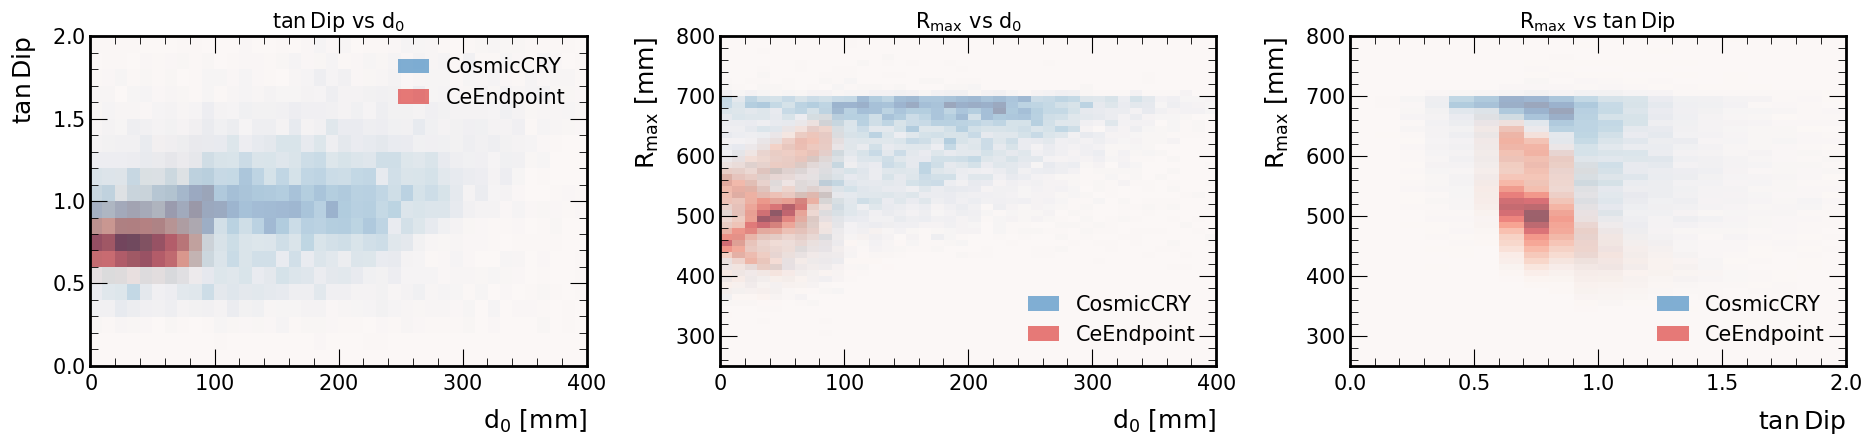

In [33]:
# Define your bin densities
BIN_DENSITY = {
    "d0": 0.1,      # bins per mm (10 mm per bin)
    "theta": 10,    # bins per tan(theta) (10 units per bin)
    "rmax": 0.1     # bins per mm (10 mm per bin)
}

# Define ranges (use the broader cosmic ranges for overlays)
RANGES = {
    "d0": (0, 400),       
    "theta": (0, 2),
    "rmax": (250, 800)   
}

def get_bins(param, range_key):
    """Calculate consistent bins based on density and range"""
    min_val, max_val = RANGES[range_key]
    n_bins = int((max_val - min_val) * BIN_DENSITY[param])
    return n_bins, min_val, max_val

# Create the plots with overlaid distributions
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8*1))

# Transparency 
alpha = 0.6

# Plot 1: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("theta", "theta")

plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["tan_dip"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["tan_dip"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"pitch angle",
    title=r"pitch angle vs $d_0$",
    ax=ax[0], show=False, leg_pos="upper right"
)

# Plot 2: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")

plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title=r"$R_{\text{max}}$ vs $d_0$",
    ax=ax[1], show=False, leg_pos="lower right"
)

# Plot 3: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")

plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["tan_dip"], axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["tan_dip"], axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"pitch angle",
    ylabel=r"$R_{\text{max}}$ [mm]", 
    title=r"$R_{\text{max}}$ vs pitch angle",
    ax=ax[2], show=False, leg_pos="lower right"
)

# ax[2].axvline(0.5577350, linestyle="--", color="grey")
# ax[2].axvline(1.0, linestyle="--", color="grey")

plt.tight_layout()
out_path = f"../../img/comp/h2_trk_corr_overlay.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

/tmp/ipykernel_398667/3532827706.py:185: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap1)(0.7), alpha=alpha, label=labels[0]),
/tmp/ipykernel_398667/3532827706.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap2)(0.7), alpha=alpha, label=labels[1])


Wrote ../../img/comp/h2o_trk_corr_overlay_with_cuts.png


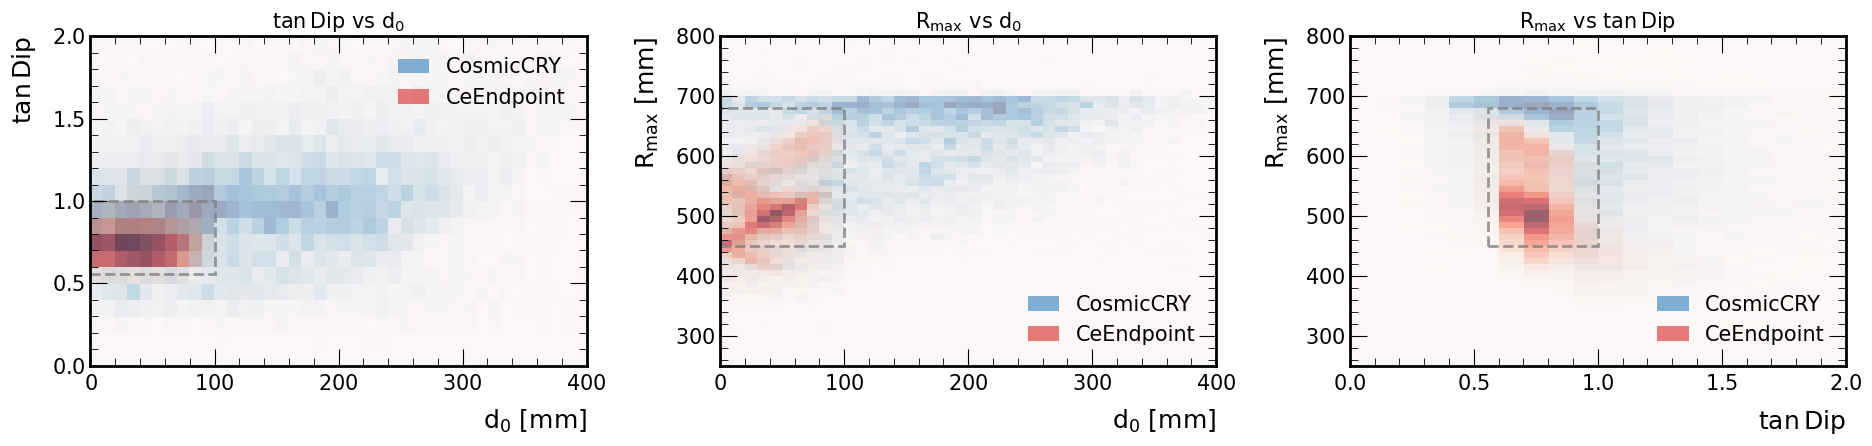

In [34]:
# Define your bin densities
BIN_DENSITY = {
    "d0": 0.1,      # bins per mm (10 mm per bin)
    "theta": 10,    # bins per tan(theta) (10 units per bin)
    "rmax": 0.1     # bins per mm (10 mm per bin)
}

# Define ranges (use the broader cosmic ranges for overlays)
RANGES = {
    "d0": (0, 400),       
    "theta": (0, 2),
    "rmax": (250, 800)   
}

# Define cut boxes - these correspond to your 1D cut lines
CUT_BOXES = {
    "d0_vs_theta": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100 from your 1D plot
        "theta_min": 0.5577350, "theta_max": 1.0  # between your two tan(dip) lines
    },
    "d0_vs_rmax": {
        "d0_min": 0, "d0_max": 100,  # d0 < 100
        "rmax_min": 450, "rmax_max": 680  # between your two Rmax lines
    },
    "theta_vs_rmax": {
        "theta_min": 0.5577350, "theta_max": 1.0,  # between tan(dip) lines
        "rmax_min": 450, "rmax_max": 680  # between Rmax lines
    }
}

def get_bins(param, range_key):
    """Calculate consistent bins based on density and range"""
    min_val, max_val = RANGES[range_key]
    n_bins = int((max_val - min_val) * BIN_DENSITY[param])
    return n_bins, min_val, max_val

def add_cut_box(ax, box_params, box_style=None):
    """Add a rectangular cut box to the plot"""
    from matplotlib.patches import Rectangle
    
    if box_style is None:
        box_style = {
            'linewidth': 2,
            'edgecolor': 'grey',
            'facecolor': 'none',
            'linestyle': '--',
            'alpha': 0.8
        }
    
    # Extract box coordinates
    if 'd0_min' in box_params and 'd0_max' in box_params:
        x_min, x_max = box_params['d0_min'], box_params['d0_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        x_min, x_max = box_params['theta_min'], box_params['theta_max']
    
    if 'theta_min' in box_params and 'theta_max' in box_params and 'd0_min' not in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'rmax_min' in box_params and 'rmax_max' in box_params:
        y_min, y_max = box_params['rmax_min'], box_params['rmax_max']
    elif 'theta_min' in box_params and 'theta_max' in box_params:
        y_min, y_max = box_params['theta_min'], box_params['theta_max']
    
    # Create rectangle
    width = x_max - x_min
    height = y_max - y_min
    rect = Rectangle((x_min, y_min), width, height, **box_style)
    ax.add_patch(rect)

# Create the plots with overlaid distributions
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8*1))

# Transparency 
alpha = 0.6

# Plot 1: d0 vs tan(theta)
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("theta", "theta")
plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["tan_dip"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["tan_dip"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"pitch angle",
    title=r"pitch angle vs $d_0$",
    ax=ax[0], show=False, leg_pos="upper right"
)
# Add cut box to first plot
add_cut_box(ax[0], CUT_BOXES["d0_vs_theta"])

# Plot 2: d0 vs R_max
nbins_x, xmin, xmax = get_bins("d0", "d0")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"$d_{0}$ [mm]", 
    ylabel=r"$R_{\text{max}}$ [mm]",
    title=r"$R_{\text{max}}$ vs $d_0$",
    ax=ax[1], show=False, leg_pos="lower right"
)
# Add cut box to second plot
add_cut_box(ax[1], CUT_BOXES["d0_vs_rmax"])

# Plot 3: tan(theta) vs R_max
nbins_x, xmin, xmax = get_bins("theta", "theta")
nbins_y, ymin, ymax = get_bins("rmax", "rmax")
plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(onspill["tan_dip"], axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(signal["tan_dip"], axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=nbins_x, xmin=xmin, xmax=xmax,
    nbins_y=nbins_y, ymin=ymin, ymax=ymax,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel=r"pitch angle",
    ylabel=r"$R_{\text{max}}$ [mm]", 
    title=r"$R_{\text{max}}$ vs pitch angle",
    ax=ax[2], show=False, leg_pos="lower right"
)
# Add cut box to third plot
add_cut_box(ax[2], CUT_BOXES["theta_vs_rmax"])

plt.tight_layout()
out_path = f"../../img/comp/h2o_trk_corr_overlay_with_cuts.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

### Prototyping below

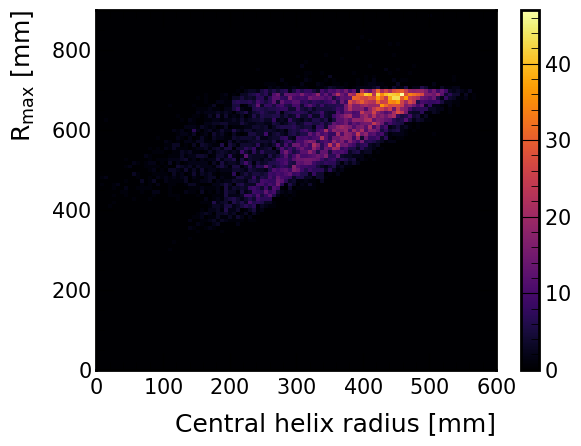

/tmp/ipykernel_398667/3532827706.py:185: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap1)(0.7), alpha=alpha, label=labels[0]),
/tmp/ipykernel_398667/3532827706.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  Patch(facecolor=plt.cm.get_cmap(cmap2)(0.7), alpha=alpha, label=labels[1])


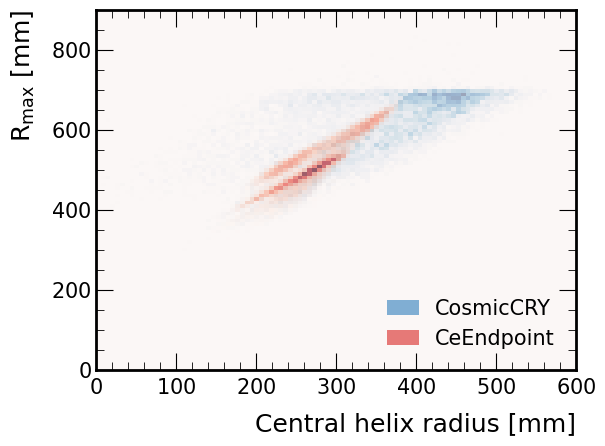

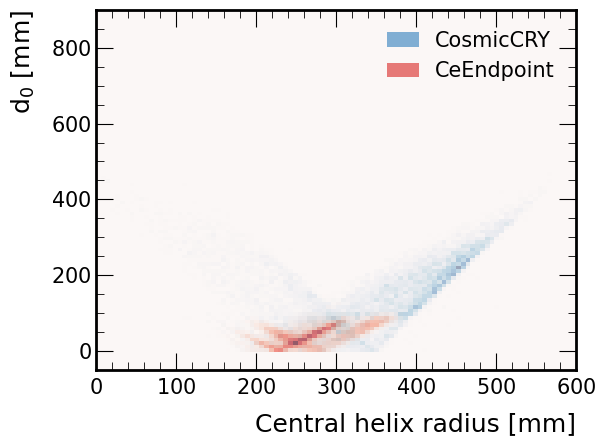

In [35]:
ct = ak.flatten(np.sqrt(onspill["trkfit"]["trksegpars_lh"]["cx"]**2 + onspill["trkfit"]["trksegpars_lh"]["cy"]**2), axis=None)
R_max = ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None)
# plt.scatter(ct, R_max)

plot.plot_2D(
    x=ct, y=R_max, nbins_x=100, xmin=0, xmax=600,  nbins_y=100, ymin=0, ymax=900,
    xlabel="Central helix radius [mm]", ylabel=r"$R_{max}$ [mm]",
)

plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(np.sqrt(onspill["trkfit"]["trksegpars_lh"]["cx"]**2 + onspill["trkfit"]["trksegpars_lh"]["cy"]**2), axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(np.sqrt(signal["trkfit"]["trksegpars_lh"]["cx"]**2 + signal["trkfit"]["trksegpars_lh"]["cy"]**2), axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["maxr"], axis=None),
    # Binning
    nbins_x=100, xmin=0, xmax=600,
    nbins_y=100, ymin=0, ymax=900,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel="Central helix radius [mm]", ylabel=r"$R_{max}$ [mm]",
    # title=r"$R_{\text{max}}$ vs pitch angle",
    show=True, leg_pos="lower right"
)

plot_2D_overlay(
    # First dataset (cosmic)
    x1=ak.flatten(np.sqrt(onspill["trkfit"]["trksegpars_lh"]["cx"]**2 + onspill["trkfit"]["trksegpars_lh"]["cy"]**2), axis=None),
    y1=ak.flatten(onspill["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    # Second dataset (signal)  
    x2=ak.flatten(np.sqrt(signal["trkfit"]["trksegpars_lh"]["cx"]**2 + signal["trkfit"]["trksegpars_lh"]["cy"]**2), axis=None),
    y2=ak.flatten(signal["trkfit"]["trksegpars_lh"]["d0"], axis=None),
    # Binning
    nbins_x=100, xmin=0, xmax=600,
    nbins_y=100, ymin=-50, ymax=900,
    # Styling
    cmap1="Blues", cmap2="Reds", alpha=alpha,
    labels=["CosmicCRY", "CeEndpoint"],
    # Labels
    xlabel="Central helix radius [mm]", ylabel=r"$d_{0}$ [mm]",
    # title=r"$R_{\text{max}}$ vs pitch angle",
    show=True, leg_pos="upper right"
)